In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [2]:
trials=100_00_00       #total simulated events
low=-1;high=1;interval=high-low
test=interval*np.random.rand(trials,3)+low
#test
x=test[:,0]
y=test[:,1]
z=test[:,2]

In [3]:
x

array([-0.36591408,  0.92730051,  0.28809821, ..., -0.2846294 ,
        0.4445505 , -0.19258337])

In [4]:
y

array([ 0.95140656,  0.07865652, -0.21029976, ..., -0.54057872,
        0.29705277,  0.78564617])

In [5]:
z

array([ 0.20223732,  0.8944295 ,  0.13124442, ...,  0.08694129,
       -0.75302272, -0.83499202])

In [6]:

r=np.sqrt(x**2+y**2+z**2)
r

array([1.03921484, 1.29076614, 0.38006798, ..., 0.61708836, 0.92353057,
       1.1625575 ])

In [7]:
test=np.column_stack((test,r))

In [8]:
df=pd.DataFrame(test,columns=['x','y','z','r']) #data frame with x,y,z and r
df.head()

,x,y,z,r
0,-0.365914,0.951407,0.202237,1.039215
1,0.927301,0.078657,0.894430,1.290766
2,0.288098,-0.210300,0.131244,0.380068
3,-0.387061,0.096707,-0.277286,0.485856
4,0.892342,0.486059,0.341604,1.072017


In [9]:
df_less=df[df.r<0.5]          #data frame with r<0.5 (radius of the bead)
df_less.head()
total_counts=df_less.shape[0]
total_counts

65638

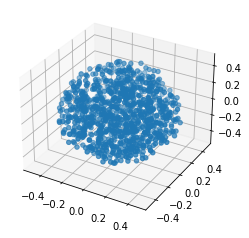

In [10]:
%matplotlib inline
df_sample=df_less.head(1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_sample.x,df_sample.y,df_sample.z)

In [11]:
#this function give the normal distance from a point to the surface of the sphere

def get_upward_distance(x,y,z,dz=0.001,r=0.5):
    '''
    returns normal distance from a point in the sphere to the surface as well as the z co-ordinate in the sphere
    '''
    #z=np.abs(z)
    d=np.sqrt(x**2+y**2+z**2)
    if z==-0.5: return 1.0,0.5
    z_up=0
    #print(f"before while z_up: {z_up}")
    while(d<r):
        z+=dz
        #print(f"Inside while z: {z}")
        z_up+=dz
        d=np.sqrt(x**2+y**2+z**2)
    #print(f"after while z_up: {z_up}")
    return z_up,z
        
    

In [12]:
#distance travelled in the bead

df_less['z_new']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[1],axis=1)
df_less['d_bead']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[0],axis=1)
df_less.head()

/tmp/ipykernel_6950/2709360843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less['z_new']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[1],axis=1)
/tmp/ipykernel_6950/2709360843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less['d_bead']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[0],axis=1)


,x,y,z,r,z_new,d_bead
2,0.288098,-0.210300,0.131244,0.380068,0.351244,0.220
3,-0.387061,0.096707,-0.277286,0.485856,0.301714,0.579
6,0.071632,-0.409361,-0.026795,0.416444,0.278205,0.305
23,-0.096496,0.284272,0.159313,0.339857,0.400313,0.241
47,0.226463,0.381790,-0.019449,0.444328,0.230551,0.250


In [13]:
#distance travelled in the button
button_thickness=3.0
df_less['d_button']=button_thickness/2.-df_less['z_new'] #Thickness of button is 3 mm and thickness above 0 is 1.5 mm
df_less.head()

/tmp/ipykernel_6950/1364162647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less['d_button']=button_thickness/2.-df_less['z_new'] #Thickness of button is 3 mm and thickness above 0 is 1.5 mm


,x,y,z,r,z_new,d_bead,d_button
2,0.288098,-0.210300,0.131244,0.380068,0.351244,0.220,1.148756
3,-0.387061,0.096707,-0.277286,0.485856,0.301714,0.579,1.198286
6,0.071632,-0.409361,-0.026795,0.416444,0.278205,0.305,1.221795
23,-0.096496,0.284272,0.159313,0.339857,0.400313,0.241,1.099687
47,0.226463,0.381790,-0.019449,0.444328,0.230551,0.250,1.269449


In [14]:
#changing mm to cm
mm_to_cm=0.1
df_less=df_less*mm_to_cm
df_less.head()

,x,y,z,r,z_new,d_bead,d_button
2,0.028810,-0.021030,0.013124,0.038007,0.035124,0.0220,0.114876
3,-0.038706,0.009671,-0.027729,0.048586,0.030171,0.0579,0.119829
6,0.007163,-0.040936,-0.002679,0.041644,0.027821,0.0305,0.122179
23,-0.009650,0.028427,0.015931,0.033986,0.040031,0.0241,0.109969
47,0.022646,0.038179,-0.001945,0.044433,0.023055,0.0250,0.126945


$ P_{transmission} = e^{-\frac{x}{\lambda}} $ <br>

x is thickness and $\lambda$ is attenuation length
<br> $\lambda = \frac{1}{\rho \cdot \mu} $ <br>
$ P_{transmission} = e^{-\mu \cdot \rho \cdot x} $ <br>

$ \mu $ ($cm^2/g$) <br> $ \rho $ ($g/cm^3$) <br> $\lambda (cm)$ <br>
$ \mu$ from https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html
<br>
Tranmission factor from: https://www.ezag.com/home/products/isotope_products/isotrak_calibration_sources/reference_sources/gamma_sources/point_sources/#c601

# fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"")
# ceramic: O7410-Na300-Ca60-Mg10-Al600-Si1600-Pb4


![image](beadcomposition.png)

In [15]:
#Probabality of scatering from the button

button_density = 1.10         #.18        #g/cm^3 (from simulation data)
#button_mu_pb   = 0.1976       #C5H8O2 for 47keV (0.047 MeV) gamma rays
bead_mu_pb     = 3.195E-01    #47 keV pb-21O for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4
bead_mu_am     = 2.314E-01    #60 keV am-241 for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4

button_mu_pb =    1.797E-01     #C870O98N32
button_mu_am =    1.669E-01     #60 keV Am-241



#trnasmission factors from manufacturer
transmission_pb=0.964   #47 keV pb-210

transmission_am=0.958   #60 keV am-241

#Am-241 0.958


#button_mu_am=0.1815    #60 keV am-241
#lambda calculation for acrylic button  (C5H802)
#fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"");
#density is from oldmc




def transmission_prob(x,mu,rho):
    '''reutrns button transmission probability'''
    #return (1-np.exp(-1.0*x*mu*rho))
    return (np.exp(-1.0*x*mu*rho))

    
    
    

In [16]:
#adding the transmississin though button
df_less['button_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_button'],button_mu_pb,button_density),axis=1)
df_less['button_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_button'],button_mu_am,button_density),axis=1)
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am
2,0.028810,-0.021030,0.013124,0.038007,0.035124,0.0220,0.114876,0.977548,0.979131
3,-0.038706,0.009671,-0.027729,0.048586,0.030171,0.0579,0.119829,0.976592,0.978241
6,0.007163,-0.040936,-0.002679,0.041644,0.027821,0.0305,0.122179,0.976138,0.977819
23,-0.009650,0.028427,0.015931,0.033986,0.040031,0.0241,0.109969,0.978497,0.980013
47,0.022646,0.038179,-0.001945,0.044433,0.023055,0.0250,0.126945,0.975219,0.976964


In [17]:
#creating the random number bewteen 0 and 1, if the prob_product is greater than random number add 1 else add 0
def random_assign(x):
    if x>np.random.rand():
        return 1
    return 0
    

In [21]:
#adding the transmississin though button
bead_density=2.55#g/cm^3  
df_less['bead_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
df_less['bead_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am,prob_product_pb,prob_product_am
2,0.028810,-0.021030,0.013124,0.038007,0.035124,0.0220,0.114876,0.977548,0.979131,0.982236,0.987102,0.960183,0.966502
3,-0.038706,0.009671,-0.027729,0.048586,0.030171,0.0579,0.119829,0.976592,0.978241,0.953923,0.966412,0.931593,0.945384
6,0.007163,-0.040936,-0.002679,0.041644,0.027821,0.0305,0.122179,0.976138,0.977819,0.975457,0.982164,0.952181,0.960378
23,-0.009650,0.028427,0.015931,0.033986,0.040031,0.0241,0.109969,0.978497,0.980013,0.980557,0.985880,0.959472,0.966175
47,0.022646,0.038179,-0.001945,0.044433,0.023055,0.0250,0.126945,0.975219,0.976964,0.979838,0.985357,0.955557,0.962658


In [22]:
N_generated=df_less.shape[0]
#df_less['N_emitted']=df_less['button_transmission_prob']*df_less['bead_transmission_prob']*N_generated
df_less['prob_product_pb']=df_less['button_transmission_prob_pb']*df_less['bead_transmission_prob_pb']
df_less['prob_product_am']=df_less['button_transmission_prob_am']*df_less['bead_transmission_prob_am']
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am,prob_product_pb,prob_product_am
2,0.028810,-0.021030,0.013124,0.038007,0.035124,0.0220,0.114876,0.977548,0.979131,0.982236,0.987102,0.960183,0.966502
3,-0.038706,0.009671,-0.027729,0.048586,0.030171,0.0579,0.119829,0.976592,0.978241,0.953923,0.966412,0.931593,0.945384
6,0.007163,-0.040936,-0.002679,0.041644,0.027821,0.0305,0.122179,0.976138,0.977819,0.975457,0.982164,0.952181,0.960378
23,-0.009650,0.028427,0.015931,0.033986,0.040031,0.0241,0.109969,0.978497,0.980013,0.980557,0.985880,0.959472,0.966175
47,0.022646,0.038179,-0.001945,0.044433,0.023055,0.0250,0.126945,0.975219,0.976964,0.979838,0.985357,0.955557,0.962658


In [23]:
#avg_of_prob_pb=round(df_less['prob_product_pb'].mean(),3)
avg_of_prob_am=round(df_less['prob_product_am'].mean(),3)
avg_of_prob_am

0.958

In [24]:
avg_random=round(df_less['prob_product_am'].apply(lambda x:random_assign(x)).mean(),3)
avg_random

0.959

# IGNORE BELOW THIS

In [25]:
def get_prob(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead
    '''
    df_less['bead_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
    df_less['prob_product_am']=df_less['button_transmission_prob_am']*df_less['bead_transmission_prob_am']
    avg_prob_am=round(df_less['prob_product_am'].mean(),3)
    return [bead_density,avg_prob_am]

In [26]:
density_prob=[]
for i in np.arange(0,4,0.05):
    test=get_prob(i)
    density_prob.append(test)
    print(f"test :{test}")
df_less.head()
    

test :[0.0, 0.98]
test :[0.05, 0.979]
test :[0.1, 0.979]
test :[0.15000000000000002, 0.978]
test :[0.2, 0.978]
test :[0.25, 0.977]
test :[0.30000000000000004, 0.977]
test :[0.35000000000000003, 0.977]
test :[0.4, 0.976]
test :[0.45, 0.976]
test :[0.5, 0.975]
test :[0.55, 0.975]
test :[0.6000000000000001, 0.974]
test :[0.65, 0.974]
test :[0.7000000000000001, 0.974]
test :[0.75, 0.973]
test :[0.8, 0.973]
test :[0.8500000000000001, 0.972]
test :[0.9, 0.972]
test :[0.9500000000000001, 0.972]
test :[1.0, 0.971]
test :[1.05, 0.971]
test :[1.1, 0.97]
test :[1.1500000000000001, 0.97]
test :[1.2000000000000002, 0.969]
test :[1.25, 0.969]
test :[1.3, 0.969]
test :[1.35, 0.968]
test :[1.4000000000000001, 0.968]
test :[1.4500000000000002, 0.967]
test :[1.5, 0.967]
test :[1.55, 0.967]
test :[1.6, 0.966]
test :[1.6500000000000001, 0.966]
test :[1.7000000000000002, 0.965]
test :[1.75, 0.965]
test :[1.8, 0.964]
test :[1.85, 0.964]
test :[1.9000000000000001, 0.964]
test :[1.9500000000000002, 0.963]
tes

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am,prob_product_pb,prob_product_am
2,0.028810,-0.021030,0.013124,0.038007,0.035124,0.0220,0.114876,0.977548,0.979131,0.982236,0.980092,0.960183,0.959638
3,-0.038706,0.009671,-0.027729,0.048586,0.030171,0.0579,0.119829,0.976592,0.978241,0.953923,0.948454,0.931593,0.927816
6,0.007163,-0.040936,-0.002679,0.041644,0.027821,0.0305,0.122179,0.976138,0.977819,0.975457,0.972507,0.952181,0.950936
23,-0.009650,0.028427,0.015931,0.033986,0.040031,0.0241,0.109969,0.978497,0.980013,0.980557,0.978213,0.959472,0.958661
47,0.022646,0.038179,-0.001945,0.044433,0.023055,0.0250,0.126945,0.975219,0.976964,0.979838,0.977408,0.955557,0.954892


In [ ]:
for i in np.linspace(0,1,0.1):
    test=get_prob(i)
    print(f"test :{test}")

In [ ]:
get_prob(0.3)

In [ ]:
avg_prob=round(df_less['prob_product'].mean(),3)
avg_prob

In [ ]:
prob=get_prob(0.1)

In [ ]:
prob

In [ ]:
for i in range(0.1,10.0,0.1):
    prob=get_prob(i)
    print(f"prob: {prob}")